pruebas de normalidad

In [1]:
# Read the file into a DataFrame: df
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [2]:
# Path to the file to be imported
path = "Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

print(CO2Data.head())

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7          

Shapiro-Wilk Test

##Si el valor p de la prueba es mayor que α = 0,05, entonces s los datos tienen una distribución normal.

In [5]:
from scipy.stats import shapiro

ta = CO2Data['ta_micromol_kg']

stat, p = shapiro(ta)
print(f'Estadístico= {stat:.5f}, p-valor= {p:.5f}')
if p > 0.05:
    print("La distribución es normal (no se rechaza H0)")
else:
    print("La distribución NO es normal (se rechaza H0)")


Estadístico= 0.87971, p-valor= 0.00000
La distribución NO es normal (se rechaza H0)


In [6]:
from scipy.stats import shapiro 

#perform Shapiro-Wilk test for normality

TA = CO2Data['ta_micromol_kg']

shapiro_results = shapiro(TA)


print(f'Statistic= {stat:.5f}, p-value= {p:.5f}')

if shapiro_results.pvalue < 0.05:
    print("The data is not normally distributed (reject H₀).")

else:
    print("The data is normally distributed (fail to reject H₀).")

    

Statistic= 0.87971, p-value= 0.00000
The data is not normally distributed (reject H₀).


In [7]:
print(shapiro_results)

ShapiroResult(statistic=np.float64(0.8797113785286559), pvalue=np.float64(9.071435657097518e-08))


When is it appropriate to use the Kolmogorov-Smirnov test instead of the Shapiro-Wilk test?

Shapito-Wilk se utliza cuando se tienen muestras pequeñas y sirve para comprobar distribución normal, miestras que Kologorov-Smirnov se utiliza cuando se tienes distribuciones de probabilidad diferentes o que tiene una distribución especifica.

In [15]:
from scipy.stats import shapiro

# Seleccionar datos
dic = CO2Data['dic_micromol_kg']          # ajusta el nombre si es diferente
salinidad = CO2Data['sal_psu']  # ajusta el nombre si es diferente

# Shapiro-Wilk para DIC
stat_dic, p_dic = shapiro(dic)
print(f"DIC: estadístico={stat_dic:.4f}, p={p_dic:.4f}")
if p_dic > 0.05:
    print("DIC parece seguir una distribución normal")
else:
    print("DIC NO parece seguir una distribución normal")

# Shapiro-Wilk para Salinidad
stat_sal, p_sal = shapiro(salinidad)
print(f"Salinidad: estadístico={stat_sal:.4f}, p={p_sal:.4f}")
if p_sal > 0.05:
    print("Salinidad tiene distribución normal")
else:
    print("Salinidad NO tiene distribución normal")

DIC: estadístico=0.8600, p=0.0000
DIC NO parece seguir una distribución normal
Salinidad: estadístico=0.8867, p=0.0000
Salinidad NO tiene distribución normal


In [17]:
from scipy.stats import kstest, norm
import numpy as np

# Datos
dic = CO2Data['dic_micromol_kg']
salinidad = CO2Data['sal_psu']

# Kolmogorov-Smirnov para DIC
stat_dic_ks, p_dic_ks = kstest(dic, 'norm', args=(np.mean(dic), np.std(dic)))
print(f"DIC (KS): estadístico={stat_dic_ks:.4f}, p={p_dic_ks:.4f}")
if p_dic_ks > 0.05:
    print("DIC parece seguir una distribución normal según KS")
else:
    print("DIC NO parece seguir una distribución normal según KS")

# Kolmogorov-Smirnov para Salinidad
stat_sal_ks, p_sal_ks = kstest(salinidad, 'norm', args=(np.mean(salinidad), np.std(salinidad)))
print(f"Salinidad (KS): estadístico={stat_sal_ks:.4f}, p={p_sal_ks:.4f}")
if p_sal_ks > 0.05:
    print("Salinidad parece seguir una distribución normal según KS")
else:
    print("Salinidad NO parece seguir una distribución normal según KS")

DIC (KS): estadístico=0.1825, p=0.0015
DIC NO parece seguir una distribución normal según KS
Salinidad (KS): estadístico=0.1516, p=0.0137
Salinidad NO parece seguir una distribución normal según KS


plot para ver la distribución 


=== dic_micromol_kg ===


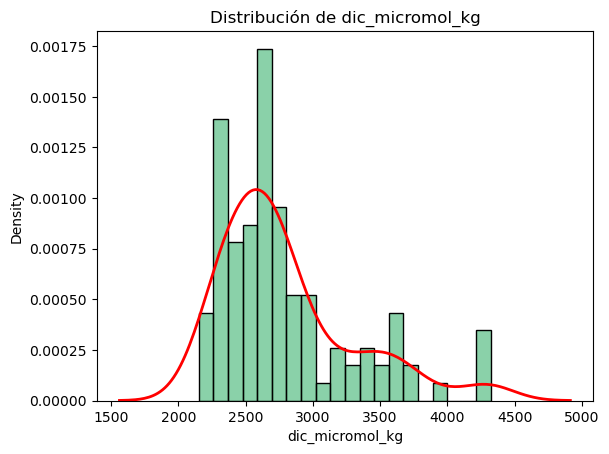


=== sal_psu ===


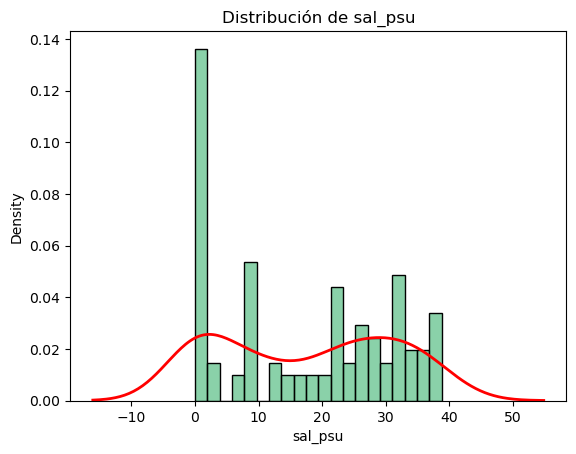

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


variables = ["dic_micromol_kg", "sal_psu"] 
for var in variables: 
    print(f"\n=== {var} ===") 
    data = CO2Data[var].dropna() 
    # Histograma + densidad 
    # Histograma
    sns.histplot(data, color="mediumseagreen", stat="density", bins=20, alpha=0.6)

    # Línea de densidad KDE
    sns.kdeplot(data, color="red", linewidth=2)
    plt.title(f"Distribución de {var}") 
    plt.show() 